# END 305E - Data Analytics for Business PROJECT


## - Salim KAPLAN --- 070180708
## - Yakup Emre GÜLHAN --- 070180147
## - Batıkan SOYSAL --- 070180114

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mobile_train.csv')

#### This dataset was taken from : https://www.kaggle.com/iabhishekofficial/mobile-price-classification

#### For this project, we are going to ignore the test set given in kaggle for now, since there are no target values available on that test data, we can not calculate our accuracy level.

#### After we come up with a decent model, we can import that too and predict their price_range values, just to show that we can import, predict and export it to an excel or csv file.

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#### We can see that there are 21 columns, one of which is out target feature, 'price_range'

#### This is a classification problem. We are required to predict the 'price_range' of our test/validation sets and check our accuracy score.

#### Independently from our target, while analysing data, the first thing we should do is preparing the data for analysis. 

#### 1- We are going to explain what the features represent, 
#### 2- Check if they are categorical or quantitative, 
#### 3- Insert dummy variables if necessary and continue from there.

In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

#### It may seem like they are all numerical, but they can be categorical in int64 dtype. So we should check every one of them, and implement dummies when necessary.

In [6]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Fortunately, we have no null values in our data. This is a good news since we can skip 'Handling NA values ' part of data preparing. 

#### Now we can start to explain the features one by one.

# Feature Explanation

# ---------------------------------------

## Target Column: 'price_range'

This column is explained as <b>'This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).'</b>  on the website we have taken our dataset from.

Let's check how many phones are in each of these classes.

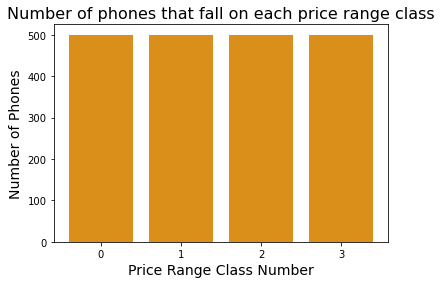

In [7]:
plot_x = [0, 1, 2, 3]
plot_y = [df['price_range'].value_counts().loc[0],
         df['price_range'].value_counts().loc[1],
         df['price_range'].value_counts().loc[2],
         df['price_range'].value_counts().loc[3]]


plt.bar(plot_x, plot_y, color = '#DA8F1B')
plt.ylabel('Number of Phones', fontsize=14)
plt.xlabel('Price Range Class Number', fontsize=14)
plt.title('Number of phones that fall on each price range class', fontsize=16)
plt.xticks(plot_x)
plt.show()

#From now on, we will use seaborn since it is easier to plot with that.

## 1st Column: 'battery_power'

This column is explained as <b>'Total energy a battery can store in one time measured in mAh'</b>  on the website we have taken our dataset from.

This suggests that this feature is probably numerical

In [8]:
#To check how many unique values this feature has
df['battery_power'].value_counts()

1872    6
1589    6
618     6
1413    5
1715    5
       ..
1199    1
1202    1
1203    1
1204    1
1998    1
Name: battery_power, Length: 1094, dtype: int64

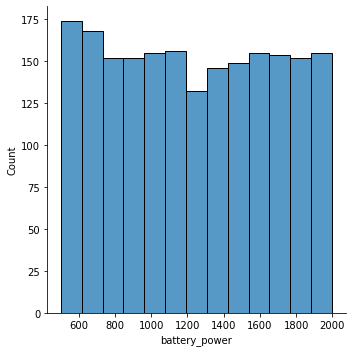

In [9]:
sns.displot(df, x="battery_power")

We can say that according to the explanation and given values on the dataset, this is not a categorical feature, rather a <b> numerical </b> one.

## 2nd Column: 'blue'

This column is explained as <b>'Has bluetooth or not'</b> on the website we have taken our dataset from.

This suggests that this feature is actually categorical, rather than numerical.

In [10]:
#To check how many unique values this feature has
df['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

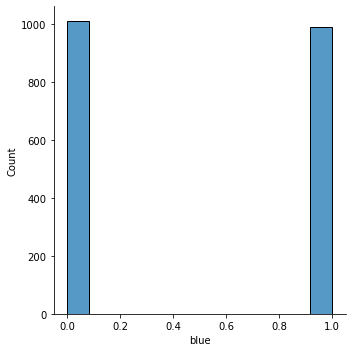

In [11]:
sns.displot(df, x="blue")

We can say that according to the explanation and given values on the dataset, this is a <b> categorical feature. </b>

Since there are only 2 values, we can leave it like this. (We do not need to add dummies for columns with 2 unique integer values)

## 3rd Column: 'clock_speed'

This column is explained as <b>'Speed at which microprocessor executes instructions'</b> on the website we have taken our dataset from.

This suggests that this feature is numerical.

In [12]:
#To check how many unique values this feature has
df['clock_speed'].value_counts()

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
2.4     58
0.8     58
0.9     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

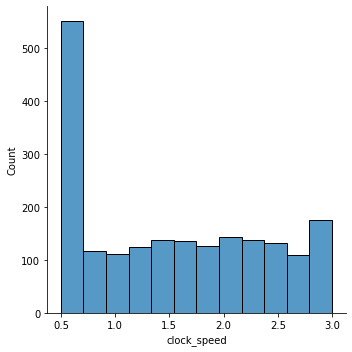

In [13]:
sns.displot(df, x="clock_speed")

We can say that according to the explanation and given values on the dataset, this is a <b> numerical feature. </b>




## 4th Column: 'dual_sim'

This column is explained as <b>'Has dual sim support or not'</b> on the website we have taken our dataset from.

This suggests that this feature is categorical.

In [14]:
#To check how many unique values this feature has
df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

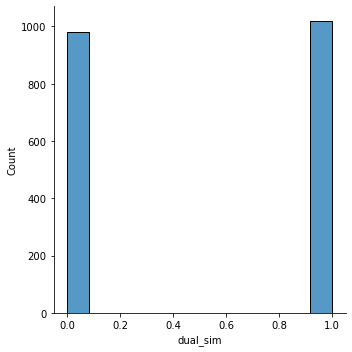

In [15]:
sns.displot(df, x="dual_sim")

We can say that according to the explanation and given values on the dataset, this is a <b> categorical feature. </b>

Since there are only 2 values, we can leave it like this. (We do not need to add dummies for columns with 2 unique integer values)

## 5th Column: 'fc'

This column is explained as <b>'Front Camera mega pixels'</b> on the website we have taken our dataset from.

This suggests that this feature is numerical.

In [16]:
#To check how many unique values this feature has
df['fc'].value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

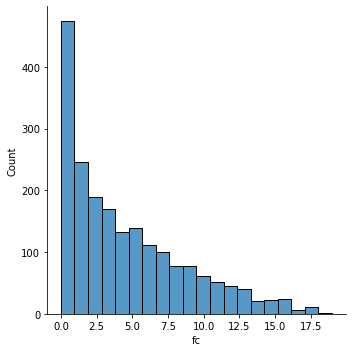

In [17]:
sns.displot(df, x="fc")

We can say that according to the explanation and given values on the dataset, this is a <b> numerical feature. </b>



## 6th Column: 'four_g'

This column is explained as <b>'Has 4G or not'</b> on the website we have taken our dataset from.

This suggests that this feature is categorical.

In [18]:
#To check how many unique values this feature has
df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

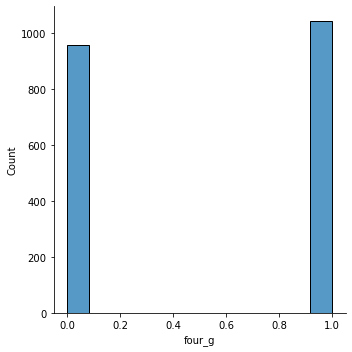

In [19]:
sns.displot(df, x="four_g")

We can say that according to the explanation and given values on the dataset, this is a <b> categorical feature. </b>

Since there are only 2 values, we can leave it like this. (We do not need to add dummies for columns with 2 unique integer values)

## 7th Column: 'int_memory'

This column is explained as <b>'Internal Memory in Gigabytes'</b> on the website we have taken our dataset from.

This suggests that this feature is numerical.

In [20]:
#To check how many unique values this feature has
df['int_memory'].value_counts()

27    47
16    45
14    45
2     42
57    42
      ..
25    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

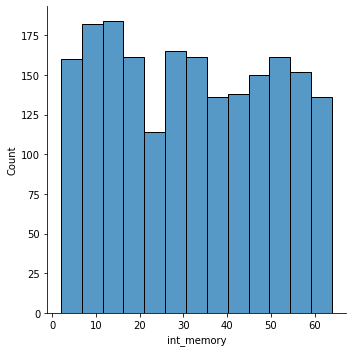

In [21]:
sns.displot(df, x="int_memory")

We can say that according to the explanation and given values on the dataset, this is a <b> numerical feature. </b>

## 8th Column: 'm_dep'

This column is explained as <b>'Mobile Depth in cm'</b> on the website we have taken our dataset from.

This suggests that this feature is probably numerical.

In [22]:
#To check how many unique values this feature has
df['m_dep'].value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

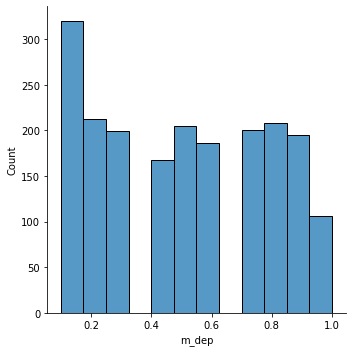

In [23]:
sns.displot(df, x="m_dep")

We can say that according to the explanation and given values on the dataset, this is a <b> numerical feature. </b>



## 9th Column: 'mobile_wt'

This column is explained as <b>'Weight of mobile phone'</b> on the website we have taken our dataset from.

This suggests that this feature is numerical.

In [24]:
#To check how many unique values this feature has
df['mobile_wt'].value_counts()

182    28
101    27
185    27
199    26
146    26
       ..
116    10
120     9
96      9
149     9
140     9
Name: mobile_wt, Length: 121, dtype: int64

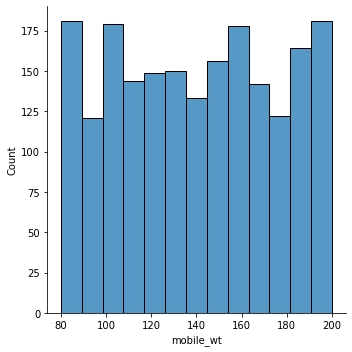

In [25]:
sns.displot(df, x="mobile_wt")

We can say that according to the explanation and given values on the dataset, this is a <b> numerical feature. </b>


## 10th Column: 'n_cores'

This column is explained as <b>'Number of cores of processor'</b> on the website we have taken our dataset from.

This suggests that this feature is numerical.

In [26]:
#To check how many unique values this feature has
df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

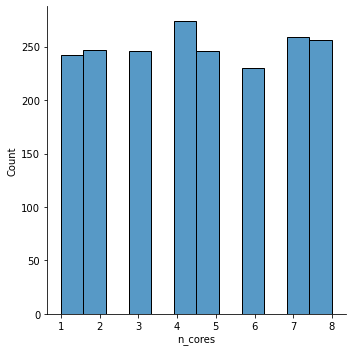

In [27]:
sns.displot(df, x="n_cores")

After checking for values, this feature could be a <b> categorical feature </b>, since there are only 8 unique values for this column.

But from the explanation of the feature, we can say that an increase in the number of cores of processor, most likely increases the price range directly. So we can leave this as a <b> numerical feature.</b>


## 11th Column: 'pc'

This column is explained as <b>'Primary Camera mega pixels'</b> on the website we have taken our dataset from.

This suggests that this feature is numerical.

In [28]:
#To check how many unique values this feature has
df['pc'].value_counts()

10    122
7     119
9     112
20    110
14    104
1     104
0     101
2      99
17     99
4      95
6      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: pc, dtype: int64

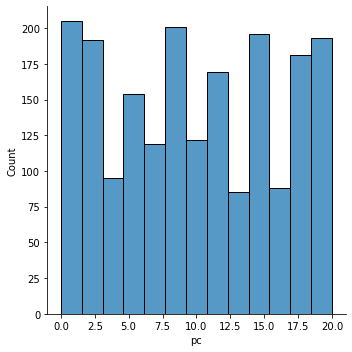

In [29]:
sns.displot(df, x="pc")

We can say that according to the explanation and given values on the dataset, this is a <b> numerical feature. </b>


## 12th Column: 'px_height'

This column is explained as <b>'Pixel Resolution Height'</b> on the website we have taken our dataset from.

This suggests that this feature is numerical.

In [30]:
#To check how many unique values this feature has
df['px_height'].value_counts()

347     7
179     6
371     6
275     6
88      5
       ..
241     1
239     1
840     1
841     1
1960    1
Name: px_height, Length: 1137, dtype: int64

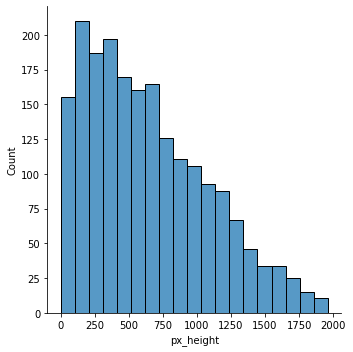

In [31]:
sns.displot(df, x="px_height")

We can say that according to the explanation and given values on the dataset, this is a <b> numerical feature. </b>


## 13th Column: 'px_width'

This column is explained as <b>'Pixel Resolution Width'</b> on the website we have taken our dataset from.

This suggests that this feature is numerical.

In [32]:
#To check how many unique values this feature has
df['px_width'].value_counts()

874     7
1247    7
1383    6
1463    6
1469    6
       ..
1427    1
850     1
1430    1
1431    1
1998    1
Name: px_width, Length: 1109, dtype: int64

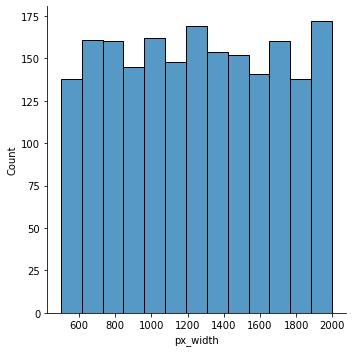

In [33]:
sns.displot(df, x="px_width")

We can say that according to the explanation and given values on the dataset, this is a <b> numerical feature. </b>


## 14th Column: 'ram'

This column is explained as <b>'Random Access Memory in Megabytes'</b> on the website we have taken our dataset from.

This suggests that this feature is numerical.

In [34]:
#To check how many unique values this feature has
df['ram'].value_counts()

3142    4
2610    4
1229    4
2227    4
1464    4
       ..
3002    1
953     1
952     1
2998    1
1012    1
Name: ram, Length: 1562, dtype: int64

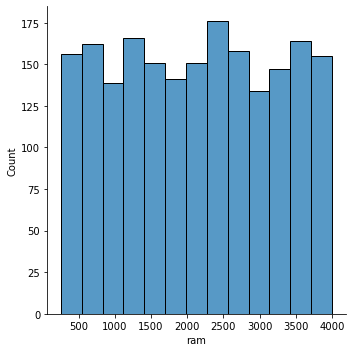

In [35]:
sns.displot(df, x="ram")

We can say that according to the explanation and given values on the dataset, this is a <b> numerical feature. </b>

## 15th Column: 'sc_h'

This column is explained as <b>'Screen Height of mobile in cm'</b> on the website we have taken our dataset from.

This suggests that this feature is numerical.

In [36]:
#To check how many unique values this feature has
df['sc_h'].value_counts()

17    193
12    157
7     151
14    143
16    143
15    135
13    131
11    126
10    125
9     124
19    124
18    120
8     117
6     114
5      97
Name: sc_h, dtype: int64

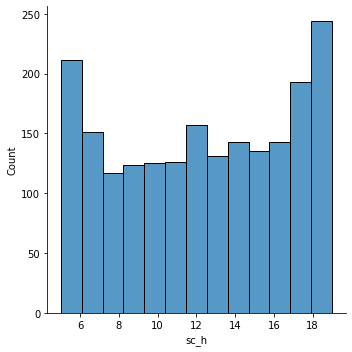

In [37]:
sns.displot(df, x="sc_h")

Eventhough there are a few unique values, we can say that according to the explanation and given values on the dataset, this is a <b> numerical feature. </b>


## 16th Column: 'sc_w'

This column is explained as <b>'Screen Width of mobile in cm'</b> on the website we have taken our dataset from.

This suggests that this feature is numerical.

In [38]:
#To check how many unique values this feature has
df['sc_w'].value_counts()

1     210
3     199
4     182
0     180
5     161
2     156
7     132
6     130
8     125
10    107
9      97
11     84
12     68
13     49
14     33
15     31
16     29
17     19
18      8
Name: sc_w, dtype: int64

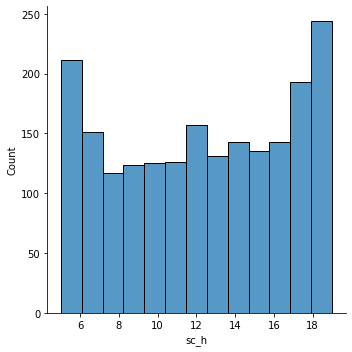

In [39]:
sns.displot(df, x="sc_h")

We can say that according to the explanation and given values on the dataset, this is a <b> numerical feature. </b>


## 17th Column: 'talk_time'

This column is explained as <b>'Longest time that a single battery charge will last when you are'</b> on the website we have taken our dataset from.

This suggests that this feature is numerical.

In [40]:
#To check how many unique values this feature has
df['talk_time'].value_counts()

7     124
4     123
16    116
15    115
19    113
6     111
10    105
8     104
11    103
20    102
14    101
13    100
9     100
18    100
12     99
2      99
17     98
3      94
5      93
Name: talk_time, dtype: int64

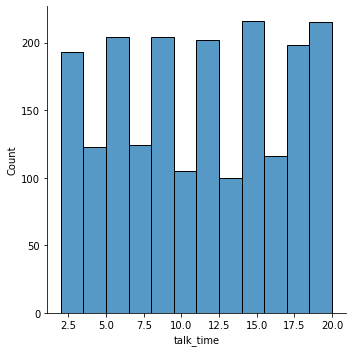

In [41]:
sns.displot(df, x="talk_time")

Eventhough there are a few unique values, we can say that according to the explanation and given values on the dataset, this is a <b> numerical feature. </b>


## 18th Column: 'three_g'

This column is explained as <b>'Has 3G or not'</b> on the website we have taken our dataset from.

This suggests that this feature is categorical.

In [42]:
#To check how many unique values this feature has
df['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

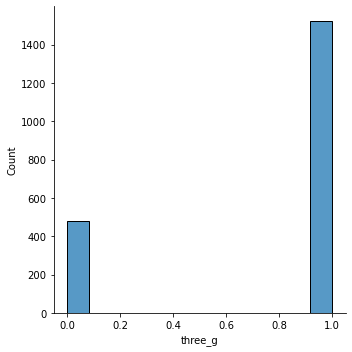

In [43]:
sns.displot(df, x="three_g")

We can say that according to the explanation and given values on the dataset, this is a <b> categorical feature. </b>

Since there are only 2 values, we can leave it like this. (We do not need to add dummies for columns with 2 unique integer values)

## 19th Column: 'touch_screen'

This column is explained as <b>'Has touch screen or not'</b> on the website we have taken our dataset from.

This suggests that this feature is categorical.

In [44]:
#To check how many unique values this feature has
df['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

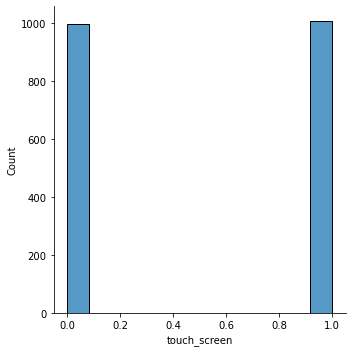

In [45]:
sns.displot(df, x="touch_screen")

We can say that according to the explanation and given values on the dataset, this is a <b> categorical feature. </b>

Since there are only 2 values, we can leave it like this. (We do not need to add dummies for columns with 2 unique integer values)

## 20th Column: 'wifi'

This column is explained as <b>'Has wifi or not'</b> on the website we have taken our dataset from.

This suggests that this feature is categorical.

In [46]:
#To check how many unique values this feature has
df['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

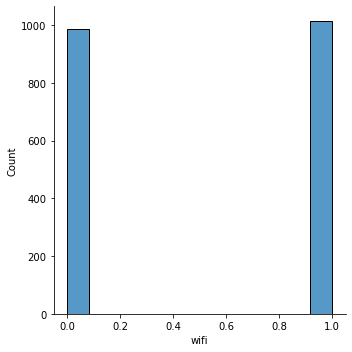

In [47]:
sns.displot(df, x="wifi")

We can say that according to the explanation and given values on the dataset, this is a <b> categorical feature. </b>

Since there are only 2 values, we can leave it like this. (We do not need to add dummies for columns with 2 unique integer values)

#### We have finished explaining and preparing our features. Fortunately, our dataset was pretty clean and prepared so we didn't have to add any dummy variable or change any value.

#### Let's look at our prepared dataset:

In [48]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#### Before we go into preparing a model, we should split our data in training and test sets.

# Train-Test Split
# ---------------------------------

In [49]:
from sklearn.model_selection import train_test_split

#### Firstly, let's prepare our X and y datasets.

In [50]:
X = df.drop(columns = 'price_range')
y = df['price_range']
print(len(X.columns))
print(y)

20
0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


#### Now let's split them into train and test

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=666)

In [52]:
#Checking to see if it is correctly split. 
print(len(X_train), len(X_test), len(y_train), len(y_test))

1400 600 1400 600


# First Model: Logistic Regression Model

# ----------------------------------------------------------------

In [53]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Firstly, let's do a base line for our model, no model selection, cross validation, no regularization, nothing. Just pure logistic regression fitting.

In [54]:
# NOTE: This step is included only to show we need to do scaling, you don't need to run this.

logmodel=LogisticRegression(max_iter=100000)
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)
print('Accuracy of the base model:', accuracy_score(y_test, y_pred))

Accuracy of the base model: 0.7783333333333333


C:\Users\batik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### As the output above suggests, we will do scaling to our data.

In [55]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify = y, random_state=666)

In [56]:
logmodel=LogisticRegression(max_iter=100000)
logmodel.fit(X_train_scaled, y_train)
y_pred = logmodel.predict(X_test_scaled)
print('Accuracy of the base Logistic Regression model:', accuracy_score(y_test, y_pred))

accuracy_of_models = []
model_names = []
accuracy_of_models.append(accuracy_score(y_test, y_pred))
model_names.append('Logistic Regression Model')

Accuracy of the base Logistic Regression model: 0.945


In [57]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
CVAccuracy=[]


X_scaled_array = np.array(X_scaled)
y_array = np.array(df['price_range'].values)

for train_index, validation_index in cv.split(X_scaled_array):
    X_train_log, X_valid, Y_train_log, Y_valid = X_scaled_array[train_index], X_scaled_array[validation_index], y_array[train_index], y_array[validation_index]

    logmodel = LogisticRegression(max_iter=100000)
    logmodel.fit(X_train_log,Y_train_log)
    CVAccuracy.append(logmodel.score(X_valid, Y_valid))

log_validation_accuracy = sum(CVAccuracy)/len(CVAccuracy)
print(log_validation_accuracy)

accuracy_of_models.append(log_validation_accuracy)
model_names.append('Logistic Regression Model Mean Cross Validation')

0.9629999999999999


Secondly, we will use one of the model selection methods to select which of the 20 features should be in our model.

## Logistic Regression with Forward Feature Selection:

In [58]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

logmodel=LogisticRegression(max_iter=1000)
sfs = SFS(logmodel, 
           k_features=20, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)
feature_names = list(X_test.columns)
sfs = sfs.fit(X_train_scaled, y_train, custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished

[2021-02-03 18:59:56] Features: 1/20 -- score: 0.75[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.0s finished

[2021-02-03 18:59:57] Features: 2/20 -- score: 0.8357142857142857[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.0s finished

[2021-02-03 18:59:59] Features: 3/20 -- score: 0.9035714285714287[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 

In [59]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T.sort_values(by = 'avg_score', ascending = False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 6, 8, 11, 12, 13, 14)","[0.975, 0.975, 0.9607142857142857, 0.975, 0.97...",0.971429,"(battery_power, int_memory, mobile_wt, px_heig...",0.007111,0.005533,0.002766
8,"(0, 4, 6, 8, 11, 12, 13, 14)","[0.9714285714285714, 0.9785714285714285, 0.964...",0.971429,"(battery_power, fc, int_memory, mobile_wt, px_...",0.006492,0.005051,0.002525
9,"(0, 1, 4, 6, 8, 11, 12, 13, 14)","[0.975, 0.9678571428571429, 0.9642857142857143...",0.970714,"(battery_power, blue, fc, int_memory, mobile_w...",0.006746,0.005249,0.002624
10,"(0, 1, 4, 6, 8, 11, 12, 13, 14, 18)","[0.9714285714285714, 0.9785714285714285, 0.967...",0.970714,"(battery_power, blue, fc, int_memory, mobile_w...",0.00609,0.004738,0.002369
6,"(0, 6, 8, 11, 12, 13)","[0.9785714285714285, 0.9714285714285714, 0.953...",0.97,"(battery_power, int_memory, mobile_wt, px_heig...",0.013177,0.010252,0.005126
11,"(0, 1, 4, 6, 8, 10, 11, 12, 13, 14, 18)","[0.9678571428571429, 0.975, 0.9642857142857143...",0.969286,"(battery_power, blue, fc, int_memory, mobile_w...",0.006227,0.004845,0.002422
5,"(0, 8, 11, 12, 13)","[0.9714285714285714, 0.95, 0.9571428571428572,...",0.968571,"(battery_power, mobile_wt, px_height, px_width...",0.016778,0.013054,0.006527
12,"(0, 1, 4, 6, 8, 10, 11, 12, 13, 14, 17, 18)","[0.9714285714285714, 0.975, 0.9678571428571429...",0.968571,"(battery_power, blue, fc, int_memory, mobile_w...",0.00609,0.004738,0.002369
13,"(0, 1, 3, 4, 6, 8, 10, 11, 12, 13, 14, 17, 18)","[0.975, 0.9714285714285714, 0.9607142857142857...",0.967857,"(battery_power, blue, dual_sim, fc, int_memory...",0.006492,0.005051,0.002525
14,"(0, 1, 3, 4, 6, 8, 10, 11, 12, 13, 14, 16, 17,...","[0.9714285714285714, 0.9785714285714285, 0.957...",0.965714,"(battery_power, blue, dual_sim, fc, int_memory...",0.011828,0.009203,0.004601


In [60]:
best_features = []

X_train_scaled_feature_selected = pd.DataFrame() 
X_test_scaled_feature_selected = pd.DataFrame()

#Preparing feature selected and scaled train/test sets
for i in list(pd.DataFrame.from_dict(sfs.get_metric_dict()).T.sort_values(by = 'avg_score', ascending = False).iloc[0,0]):
    best_features.append(X_train.columns[i])
    X_train_scaled_feature_selected[X_train.columns[i]] = X_train_scaled[:,i]
    X_test_scaled_feature_selected[X_test.columns[i]] = X_test_scaled[:,i]

print(best_features)

['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram', 'sc_h']


#### We have found the best features to be : 
'battery_power',
 'int_memory',
 'mobile_wt',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 
#### Now let's try a model with only these features and check its score.

In [61]:
logmodel=LogisticRegression(max_iter=10000)
logmodel.fit(X_train_scaled_feature_selected, y_train)

y_pred = logmodel.predict(X_test_scaled_feature_selected)
print('Accuracy of the feature selected and scaled model:', accuracy_score(y_test, y_pred))

accuracy_of_models.append(accuracy_score(y_test, y_pred))
model_names.append('Logistic Regression Model with Forward Feature Selection')

Accuracy of the feature selected and scaled model: 0.95


In [62]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
CVAccuracy=[]


X_scaled_array = np.array(X_test_scaled_feature_selected)
y_array = np.array(df['price_range'].values)

for train_index, validation_index in cv.split(X_scaled_array):
    X_train_log, X_valid, Y_train_log, Y_valid = X_scaled_array[train_index], X_scaled_array[validation_index], y_array[train_index], y_array[validation_index]

    logmodel = LogisticRegression(max_iter=10000)
    logmodel.fit(X_train_log,Y_train_log)
    CVAccuracy.append(logmodel.score(X_valid, Y_valid))

log_validation_accuracy = sum(CVAccuracy)/len(CVAccuracy)
print(log_validation_accuracy)

accuracy_of_models.append(log_validation_accuracy)
model_names.append('FFS Log. Reg. Model Mean Cross Validation')

0.24999999999999994


#### If we did cross-validation correctly, we would probably get an accuracy score closer to 0.971429, if we can't reach this accuracy after trying all the algorithms, we can come back to this and do cross-validation.

#### Let's check for confusion matrix, since this is a multiclass classification and we haven't done any examples on mesauring precision or other errors, we won't do that.

In [63]:
from sklearn.metrics import confusion_matrix

logmodel=LogisticRegression(max_iter=10000)
logmodel.fit(X_train_scaled_feature_selected, y_train)
y_pred = logmodel.predict(X_test_scaled_feature_selected)

logmodel_cf_matrix = confusion_matrix(y_test, y_pred)
logmodel_cf_matrix

array([[146,   4,   0,   0],
       [  7, 141,   2,   0],
       [  0,   9, 137,   4],
       [  0,   0,   4, 146]], dtype=int64)

<AxesSubplot:>

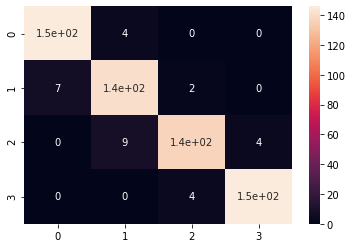

In [64]:
sns.heatmap(logmodel_cf_matrix, annot = True)

# Second Model : KNN

# -------------------------------------------------------------

In [96]:
# We will start by trying a random k value without making any model selection

from sklearn.neighbors import KNeighborsClassifier
# Creating a KNN classifier with the KNN value 3
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn.fit(X_train,y_train)

#Predicting the target values for the test data
y_pred = knn.predict(X_test)

print('Accuracy Score for a basic KNN model: ', knn.score(X_test, y_test))

accuracy_of_models.append(knn.score(X_test, y_test))
model_names.append('KNN Model with k = 3')

Accuracy Score for a basic KNN model:  0.91


In [66]:
X_array = np.array(X)
y_array = np.array(df['price_range'].values)

In [67]:
# Now let's do a KFOLD Cross validation for different k values on our KNN model.
#Creating a KNN classifier with 10 fold cross validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
CVAccuracy=[]

for train_index, validation_index in cv.split(X_array):
    X_train_KNN, X_valid, Y_train_KNN, Y_valid = X_array[train_index], X_array[validation_index], y_array[train_index], y_array[validation_index]
    
    for j in range(1,50):
        knn = KNeighborsClassifier(n_neighbors = j)
        knn.fit(X_train_KNN,Y_train_KNN)
        CVAccuracy.append([knn.score(X_valid, Y_valid),j])
        
knn_df = pd.DataFrame (CVAccuracy,columns=['Validation Accuracy','NeighbourSize'])
print(knn_df)

     Validation Accuracy  NeighbourSize
0                  0.875              1
1                  0.880              2
2                  0.905              3
3                  0.910              4
4                  0.905              5
..                   ...            ...
485                0.920             45
486                0.900             46
487                0.920             47
488                0.915             48
489                0.910             49

[490 rows x 2 columns]


NeighbourSize          9.0000
Validation Accuracy    0.9325
Name: 8, dtype: float64

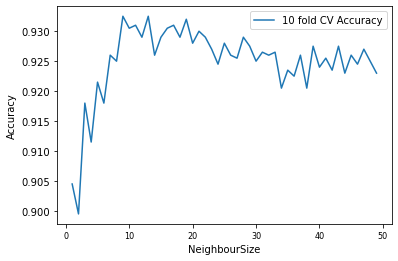

In [68]:
kfoldCV = knn_df.groupby("NeighbourSize")
kfoldCV = kfoldCV.mean()
kfoldCV = kfoldCV.reset_index()
kfoldCV[['NeighbourSize', 'Validation Accuracy']]

fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(kfoldCV['NeighbourSize'].values,kfoldCV['Validation Accuracy'].values,label = '10 fold CV Accuracy')
ax.set_xlabel('NeighbourSize')
ax.set_ylabel('Accuracy')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')
kfoldCV[['NeighbourSize', 'Validation Accuracy']].sort_values(by = 'Validation Accuracy', ascending = False).iloc[0]

### As seen above, best K neighbour size is calculated as 9 and the cross validation accuracy score is 0.9325, which is the best we have found for our KNN model.

In [69]:
accuracy_of_models.append(0.9325)
model_names.append('KNN Model with k = 9 Mean Cross Validation')

# Third Model : Decision Tree
# ------------------------------------------------------------------

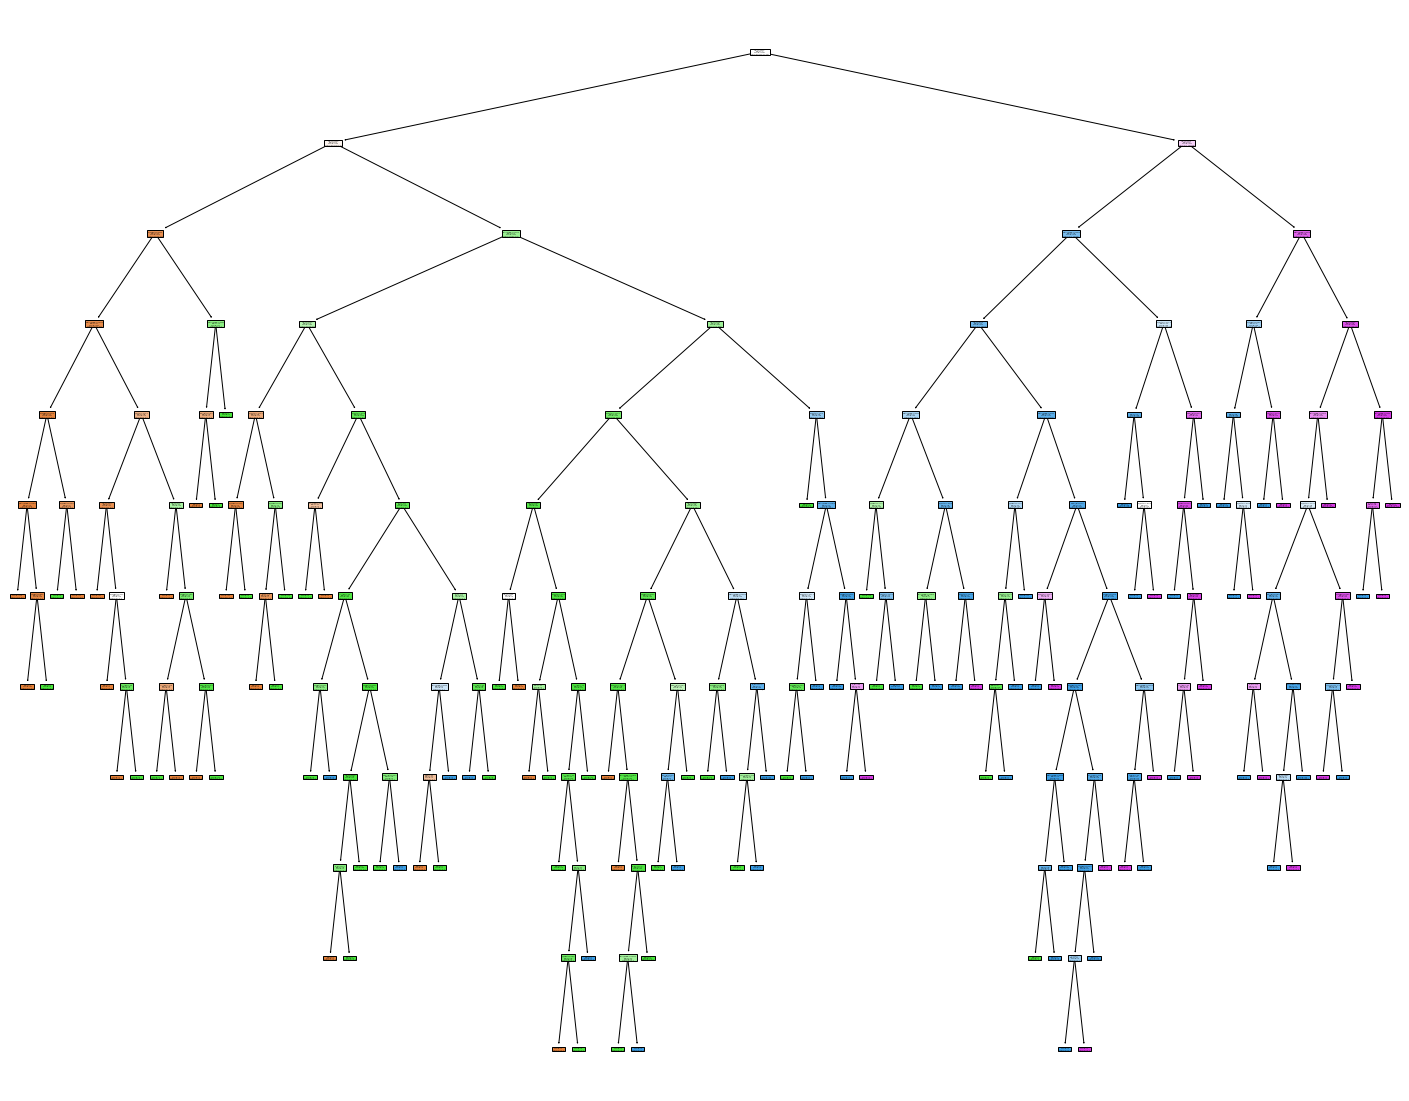

In [70]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# We will proceed with implementing decision trees which , in general, have more interpretability but less accuracy.

# At the beginning, we will have the fully-grown tree which is not interpretable and readable.

classifier = DecisionTreeClassifier(random_state = 0)  
classifier.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, feature_names=X.columns, filled=True)

Adding "ccp_alpha" value as an argument gives a penalty for each node added to the tree. That helps us prune the tree in 
order to have both interpretable and accurate model.

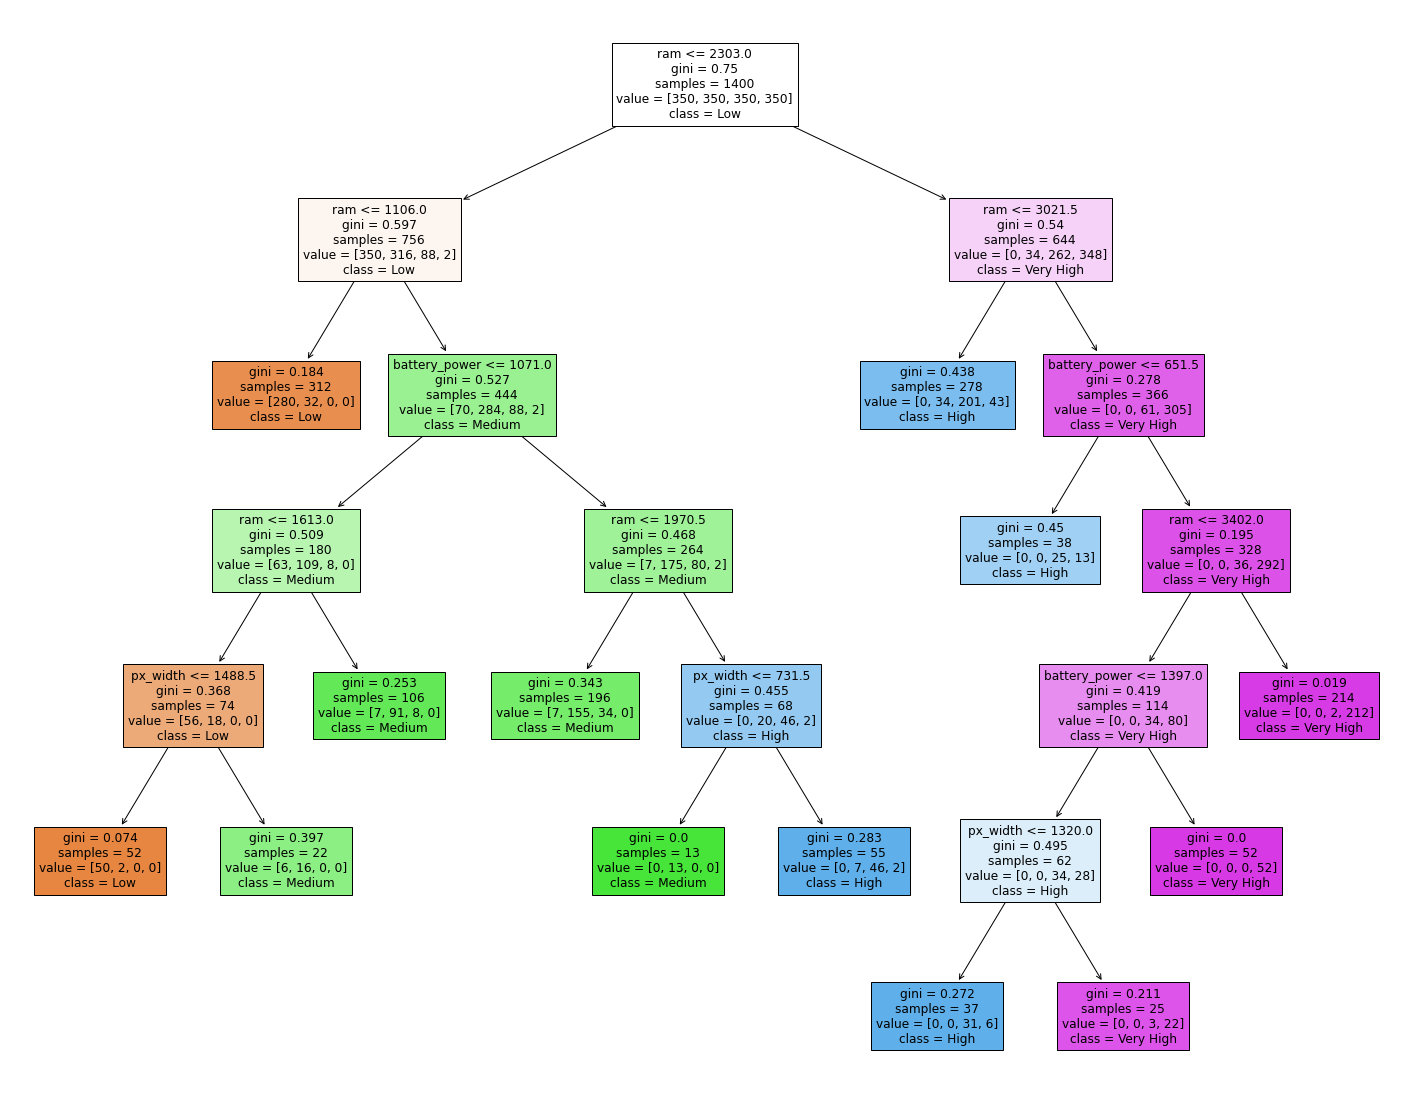

In [71]:
#Setting the alpha value as 0.01
classifier = DecisionTreeClassifier(random_state = 0,ccp_alpha=0.01)  
classifier.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, class_names=['Low','Medium','High','Very High'],feature_names=X.columns, filled=True)

In [72]:
#Predicting the test data
y_pred = classifier.predict(X_test)

accuracy_score(y_test,y_pred)

0.7833333333333333

In [73]:
classifier = DecisionTreeClassifier(random_state = 0) 
path = classifier.cost_complexity_pruning_path(X_train, y_train)

#Applying KFold cross validation and obtaining the optimal alpha value for the model
cv = KFold(n_splits=10, random_state=10, shuffle=True)
CVErrors=[]
for i in path.ccp_alphas:
    for train_index, validation_index in cv.split(X_train):
        X_trainp, X_valid = X_train.iloc[train_index], X_train.iloc[validation_index]
        y_trainp, y_valid = y_train.iloc[train_index], y_train.iloc[validation_index]
        classifier = DecisionTreeClassifier(random_state = 0, ccp_alpha=i)
        classifier.fit(X_trainp, y_trainp) 
        y_pred=classifier.predict(X_valid)
        CVErrors.append([i,accuracy_score(y_trainp, classifier.predict(X_trainp)),accuracy_score(y_valid, y_pred)])    
df = pd.DataFrame(CVErrors,columns=['alpha','Training Accuracy','Validation Accuracy'])
kfoldCV_by_alpha = df.groupby('alpha')
kfoldCV_by_alpha = kfoldCV_by_alpha.mean()
kfoldCV_by_alpha = kfoldCV_by_alpha.reset_index()
kfoldCV_by_alpha

,alpha,Training Accuracy,Validation Accuracy
0,0.000000,1.000000,0.837857
1,0.000672,0.999841,0.837857
2,0.000686,0.999762,0.837857
3,0.000693,0.999762,0.837857
4,0.000700,0.999762,0.837857
...,...,...,...
63,0.018097,0.795397,0.765000
64,0.020089,0.785476,0.762143
65,0.088597,0.753175,0.735714
66,0.114527,0.545476,0.530714


In [74]:
kfoldCV_by_alpha.sort_values(by=['Validation Accuracy'],ascending=False)

,alpha,Training Accuracy,Validation Accuracy
31,0.002381,0.952143,0.857143
30,0.002107,0.961111,0.857143
32,0.002449,0.949286,0.857143
27,0.001948,0.963413,0.856429
29,0.002045,0.961984,0.856429
...,...,...,...
63,0.018097,0.795397,0.765000
64,0.020089,0.785476,0.762143
65,0.088597,0.753175,0.735714
66,0.114527,0.545476,0.530714


Test Accuracy: 0.8233333333333334


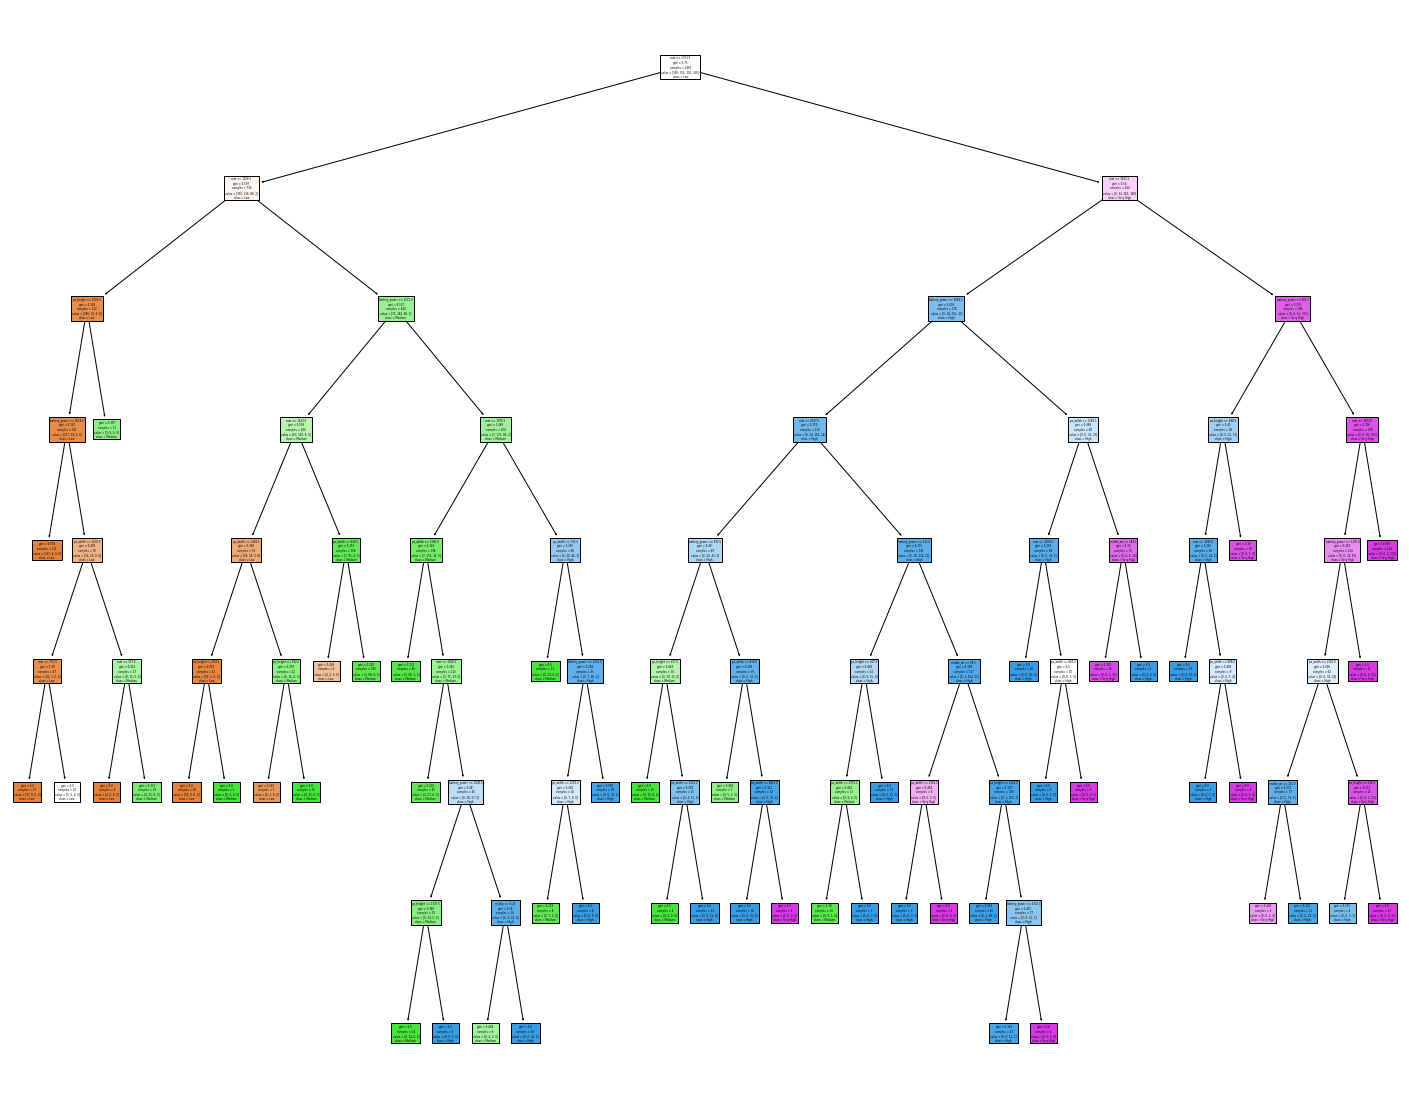

In [75]:
classifier = DecisionTreeClassifier(random_state = 0,ccp_alpha=0.002381)  
classifier.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, class_names=['Low','Medium','High','Very High'],feature_names=X.columns, filled=True)
y_pred = classifier.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

In [76]:
accuracy_of_models.append(accuracy_score(y_test, y_pred))
model_names.append('Decision Tree Model')

Test Accuracy: 0.78


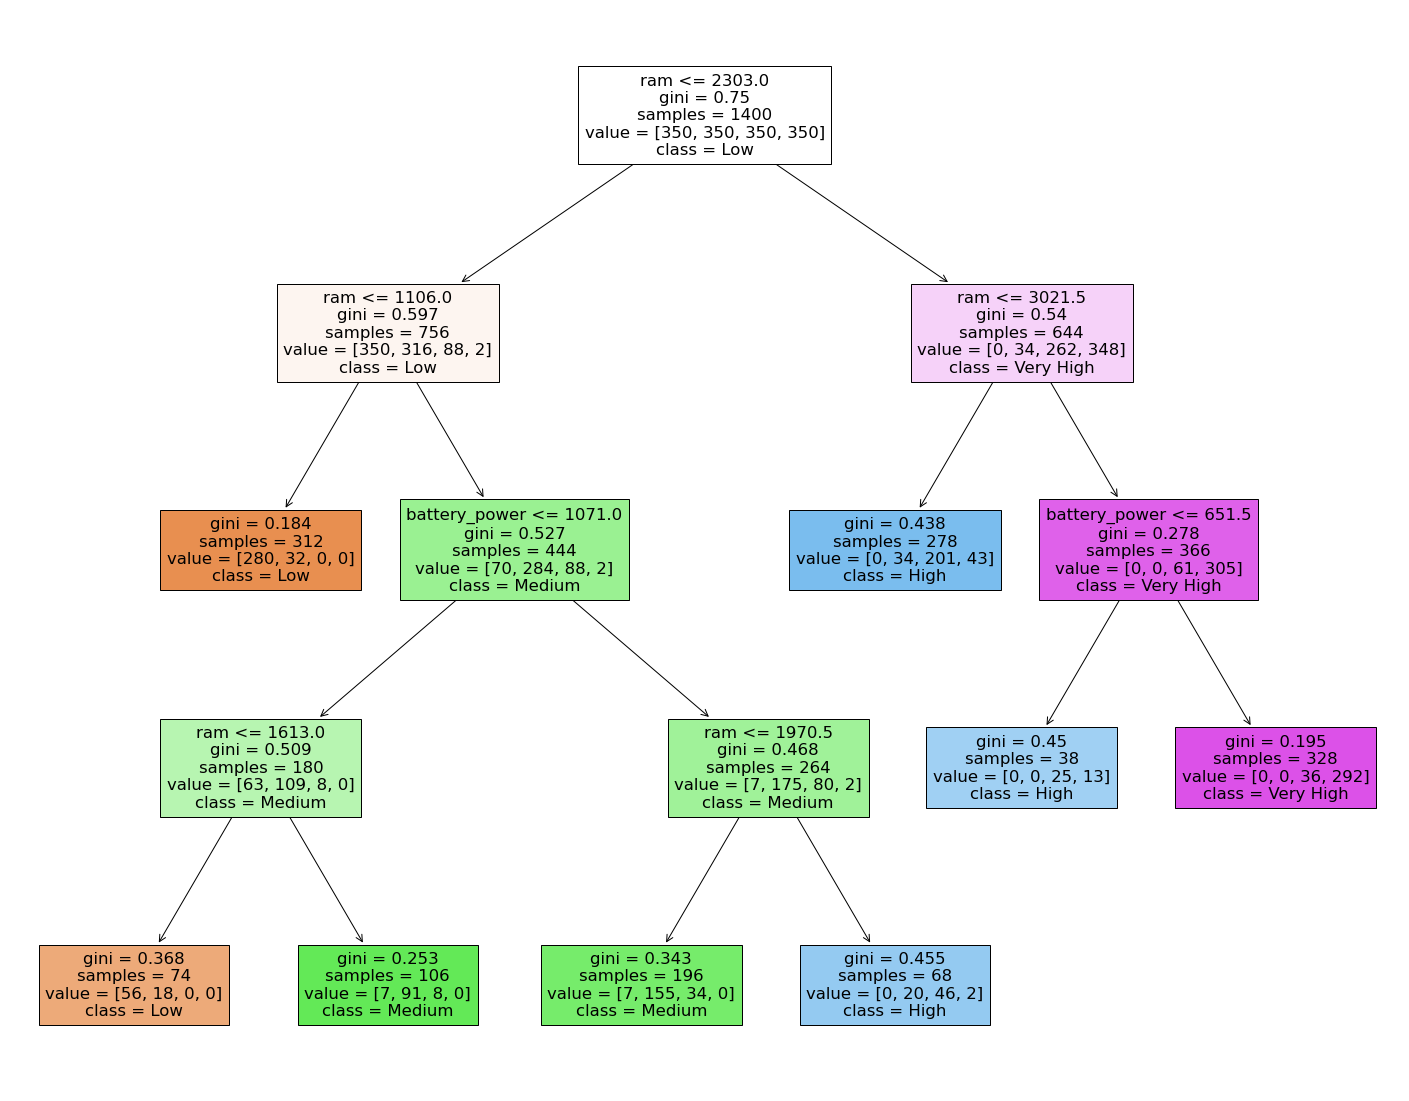

In [77]:
classifier = DecisionTreeClassifier(random_state = 0,ccp_alpha=0.01185)  
classifier.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, class_names=['Low','Medium','High','Very High'],feature_names=X.columns, filled=True)
y_pred = classifier.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

This tree has a lower accuracy score but it is more interpretable.

# Fourth Model : Random Forest

# -----------------------------------------------------------

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
#Fit 100 trees and bag them
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, random_state=0,oob_score=True)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True, random_state=0)

In [79]:
y_pred=bag.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred),'Oob Accuracy:',bag.oob_score_)

Test Accuracy: 0.8766666666666667 Oob Accuracy: 0.9


In [80]:
#Let's fit random forests
clf=RandomForestClassifier(random_state=0,n_estimators=100,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred),'Oob Accuracy:',clf.oob_score_)

Test Accuracy: 0.8766666666666667 Oob Accuracy: 0.87


In [81]:
#Let's try different numbers of trees
Oob_Accuracy=[]
for i in np.linspace(start = 50, stop = 500, num = 10):
    clf=RandomForestClassifier(random_state=0,n_estimators=int(i),oob_score=True)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    Oob_Accuracy.append([i,np.array(clf.oob_score_)])
random_forest_df = pd.DataFrame(Oob_Accuracy,columns=['Number_of_Trees','Oob Accuracy'])
random_forest_df

,Number_of_Trees,Oob Accuracy
0,50.0,0.8457142857142858
1,100.0,0.87
2,150.0,0.8764285714285714
3,200.0,0.8778571428571429
4,250.0,0.88
5,300.0,0.8842857142857142
6,350.0,0.88
7,400.0,0.8778571428571429
8,450.0,0.875
9,500.0,0.8778571428571429


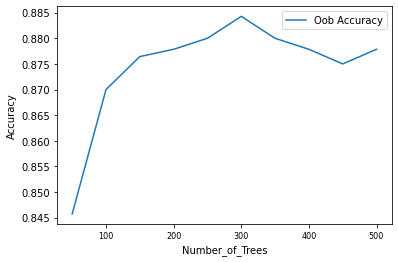

In [82]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(random_forest_df['Number_of_Trees'].values,random_forest_df['Oob Accuracy'].values,label = 'Oob Accuracy')
ax.set_xlabel('Number_of_Trees')
ax.set_ylabel('Accuracy')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [83]:
#Although we picked 350, we could have picked a bigger number. Higher Number of trees do not lead to overfitting
clf=RandomForestClassifier(random_state=0,n_estimators=350,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8833333333333333

In [84]:
#Let's try different numbers of features at each split (default is sqrt(p) where p is the number of features)
Oob_Accuracy=[]
for i in range(1,9):
    clf=RandomForestClassifier(random_state=0,n_estimators=350,max_features=i,oob_score=True)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    Oob_Accuracy.append([i,np.array(clf.oob_score_)])
df = pd.DataFrame(Oob_Accuracy,columns=['Number_of_Features','Oob Accuracy'])
df

,Number_of_Features,Oob Accuracy
0,1,0.7057142857142857
1,2,0.8164285714285714
2,3,0.8614285714285714
3,4,0.88
4,5,0.8921428571428571
5,6,0.8892857142857142
6,7,0.9007142857142857
7,8,0.8964285714285715


In [85]:
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier(random_state=0)
# number of trees in random forest
n_estimators = [100,200,300,400,500,600]
# number of features at every split
max_features = [1,2,3,4,5,6,7,8]
# create grid
params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }

# Grid search of parameters
clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   34.7s finished


{'max_features': 8, 'n_estimators': 100}


In [86]:
clf=RandomForestClassifier(random_state=0,n_estimators=100,max_features=8,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

model_names.append("Random Forest Model")
accuracy_of_models.append(accuracy_score(y_test, y_pred))

Test Accuracy: 0.885


#### Now we are going to do both cross-validation and grid search. This can take a long time(~5 minutes) to run so it is not recommended to run this line.

In [87]:
clf=RandomForestClassifier(random_state=0)
# number of trees in random forest
n_estimators = [100,200,300,400,500,600]
# number of features at every split
max_features = [5,6,7,8,9,10,11,12,13,14]
# create grid
params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }
#Instead of one test set we will use cross validation, please note that both parameter selection and 
#the test performance is computed via cross validation (a nested cross-validation) 
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[validation_index], 
    y_train, y_test = y.iloc[train_index], y.iloc[validation_index]
    # Grid search of parameters
    clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)
    # Fit the model
    clf_grid.fit(X_train, y_train)
    # print results
    print(clf_grid.best_params_)
    #After finding best parameters fit the model
    clf=RandomForestClassifier(**clf_grid.best_params_)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    #Test the performance on the test set
    CVErrors.append(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   55.6s finished


{'max_features': 12, 'n_estimators': 200}
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   59.5s finished


{'max_features': 13, 'n_estimators': 300}
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   59.1s finished


{'max_features': 11, 'n_estimators': 600}
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   58.5s finished


{'max_features': 13, 'n_estimators': 400}
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   57.9s finished


{'max_features': 14, 'n_estimators': 300}


In [88]:
print(np.mean(CVErrors))
model_names.append("Random Forest Model Mean Cross Validation")
accuracy_of_models.append(np.mean(CVErrors))

0.8955


### We have used 4 different algorithms with cross-validations and some with feature selections. Below there will be a dataframe to compare our results from all this models. After seeing these results we will select the best model and find its coeffiecents. Then see which feature effects the target column most.

In [89]:
comparison_df = pd.DataFrame({'Models': model_names, 'Accuracy Scores': accuracy_of_models})
comparison_df

,Models,Accuracy Scores
0,Logistic Regression Model,0.945000
1,Logistic Regression Model Mean Cross Validation,0.963000
2,Logistic Regression Model with Forward Feature...,0.950000
3,FFS Log. Reg. Model Mean Cross Validation,0.250000
4,KNN Model with k = 3,0.910000
5,KNN Model with k = 9 Mean Cross Validation,0.932500
6,Decision Tree Model,0.823333
7,Random Forest Model,0.885000
8,Random Forest Model Mean Cross Validation,0.895500


In [90]:
comparison_df.sort_values(by = 'Accuracy Scores', ascending = False)

,Models,Accuracy Scores
1,Logistic Regression Model Mean Cross Validation,0.963000
2,Logistic Regression Model with Forward Feature...,0.950000
0,Logistic Regression Model,0.945000
5,KNN Model with k = 9 Mean Cross Validation,0.932500
4,KNN Model with k = 3,0.910000
8,Random Forest Model Mean Cross Validation,0.895500
7,Random Forest Model,0.885000
6,Decision Tree Model,0.823333
3,FFS Log. Reg. Model Mean Cross Validation,0.250000


### As seen above, the model with the highest accuracy score was found as the Logistic Regression model. Since forward feature selected logistic regression model is almost as accuracte as the base model and it is easy to interpret, we can use this model as our final model.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=666)

logmodel=LogisticRegression(max_iter=10000)
logmodel.fit(X_train_scaled_feature_selected, y_train)

y_pred = logmodel.predict(X_test_scaled_feature_selected)
print('Accuracy of the feature selected and scaled model:', accuracy_score(y_test, y_pred))

Accuracy of the feature selected and scaled model: 0.95


In [92]:
#Since our features are scaled, we can use the coeffiecents as a way to see the importance of that feature.

print(logmodel.coef_)

[[-2.70521818e+00 -1.82764987e-01  2.52492929e-01 -1.44412193e+00
  -1.53544885e+00 -1.03753361e+01 -1.89734306e-03]
 [-8.24963345e-01 -1.20383042e-02  1.46691867e-01 -4.04441126e-01
  -4.95284074e-01 -3.32796424e+00 -1.17501112e-01]
 [ 8.57480001e-01 -3.91316349e-02  5.50903275e-02  4.41737508e-01
   4.80057872e-01  3.30914795e+00 -1.13045066e-01]
 [ 2.67270153e+00  2.33934926e-01 -4.54275124e-01  1.40682555e+00
   1.55067505e+00  1.03941524e+01  2.32443522e-01]]


In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       150
           1       0.92      0.94      0.93       150
           2       0.96      0.91      0.94       150
           3       0.97      0.97      0.97       150

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



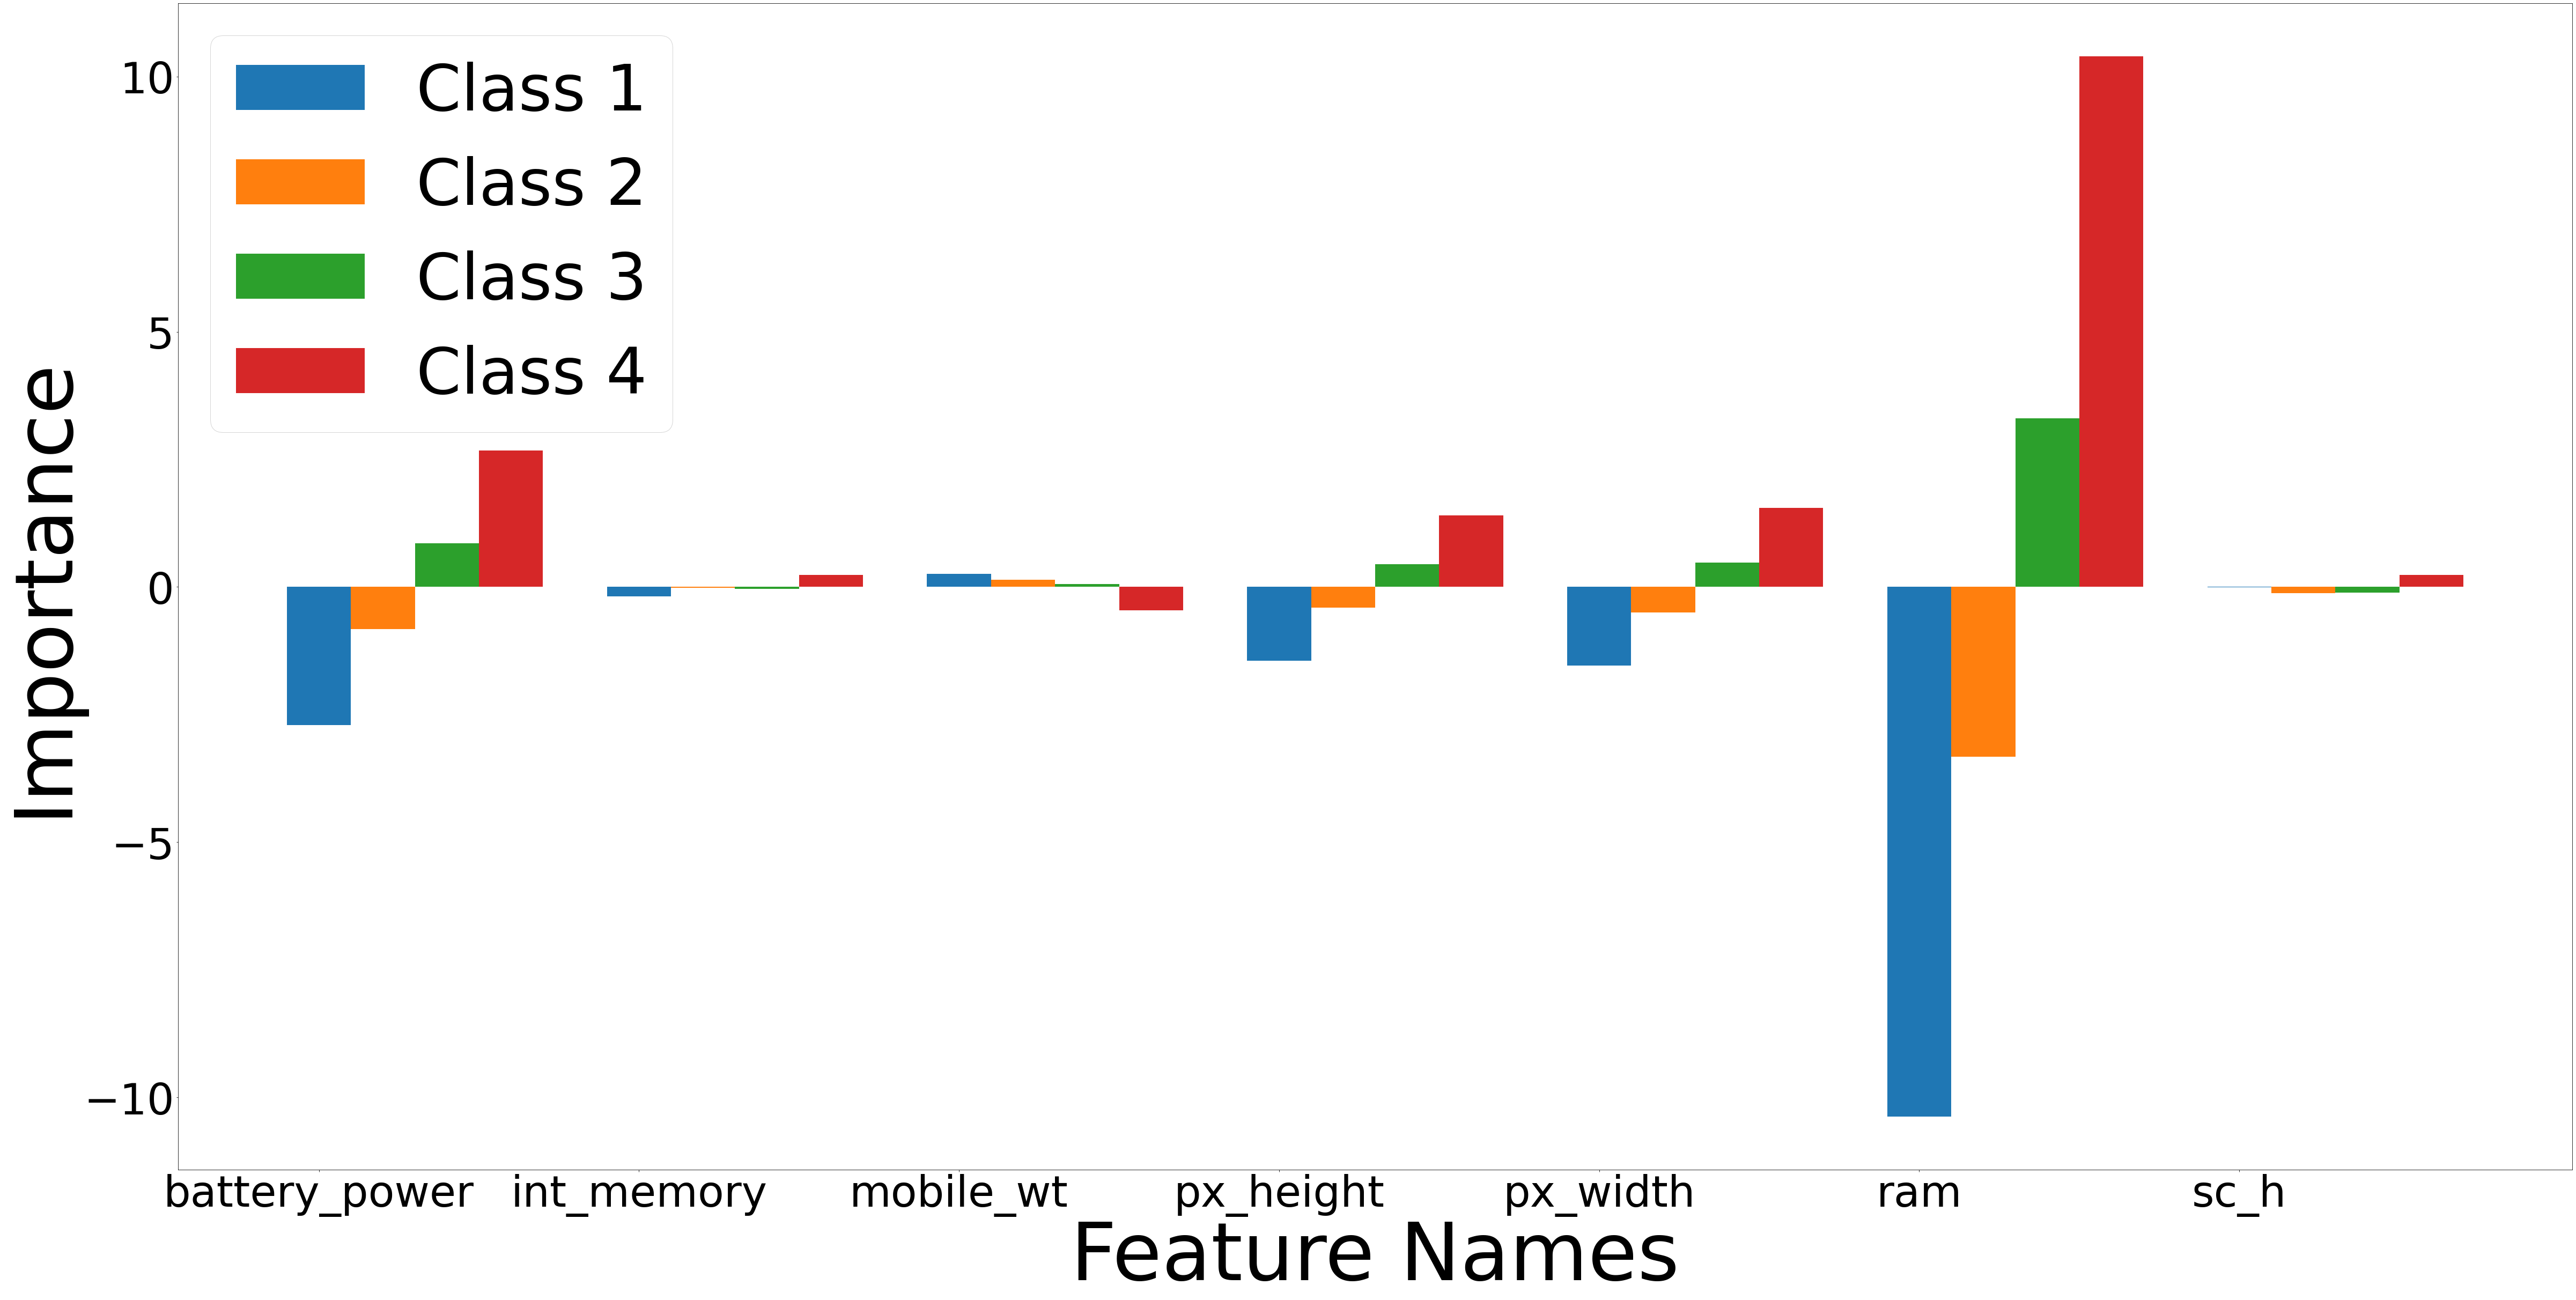

In [94]:
# get importance
importance1 = logmodel.coef_[0]
importance2 = logmodel.coef_[1]
importance3 = logmodel.coef_[2]
importance4 = logmodel.coef_[3]
width = 0.2

# plotting feature importance
plt.figure(figsize = (80,40))
plt.bar([x for x in range(len(importance1))], importance1, width, label = 'Class 1')
plt.bar([width+x for x in range(len(importance2))], importance2, width, label = 'Class 2')
plt.bar([2*width+x for x in range(len(importance3))], importance3, width, label = 'Class 3')
plt.bar([3*width+x for x in range(len(importance4))], importance4, width, label = 'Class 4')

plt.xticks(np.arange(7), best_features, size = 80)
plt.yticks([-10, -5, 0, 5, 10], size = 80)

plt.xlabel('Feature Names', size = 150)
plt.ylabel('Importance', size = 150)
plt.legend(loc = 'best', fontsize = 120)
plt.show()



### We can say that as importance reaches high - or high + values, that feature is very important to determine the price range. From the plot above, we can see that the ram of the phone is very important to find the price range of that phone. High ram increases the price range, same with batter_power, int_memory, px_height and px_width. mobile_wt has an opposite affect on the price range. sc_h and int_memory has a very small effect on the price_range. 